In [27]:
# import libraries for Project Credit Card Fraud Detection Project using Machine Learning:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
from sklearn.svm import SVC

In [10]:
#Loading the dataset to a Pandas Dataframe
import pandas as pd
import random

df = pd.read_csv ('E:creditcard.csv')
#counting all NaN values
print('There are ',df.isna().sum().sum(),' NaN values in this CSV file')
newdf = df.fillna(random.uniform(-1,1))

newdf.to_csv('E:\\New_creditcard.csv')

credit_card_data = pd.read_csv('E:\\New_creditcard.csv')

There are  102  NaN values in this CSV file


In [11]:
# let's see first 5 rows of the dataset:

credit_card_data.head(5)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,-0.697344,0.060018,-0.082361,-0.697344,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.697344,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,-0.697344,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
# dataset information: 
credit_card_data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  284807 non-null  int64  
 1   Time        284807 non-null  float64
 2   V1          284807 non-null  float64
 3   V2          284807 non-null  float64
 4   V3          284807 non-null  float64
 5   V4          284807 non-null  float64
 6   V5          284807 non-null  float64
 7   V6          284807 non-null  float64
 8   V7          284807 non-null  float64
 9   V8          284807 non-null  float64
 10  V9          284807 non-null  float64
 11  V10         284807 non-null  float64
 12  V11         284807 non-null  float64
 13  V12         284807 non-null  float64
 14  V13         284807 non-null  float64
 15  V14         284807 non-null  float64
 16  V15         284807 non-null  float64
 17  V16         284807 non-null  float64
 18  V17         284807 non-null  float64
 19  V1

In [13]:
# checking number of missing values:
print(credit_card_data.isnull().sum())

# Find distribution of Normal transaction or Fraud transaction:
credit_card_data['Class'].value_counts()


Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64


Class
0    284315
1       492
Name: count, dtype: int64

(284315, 32)
(492, 32)


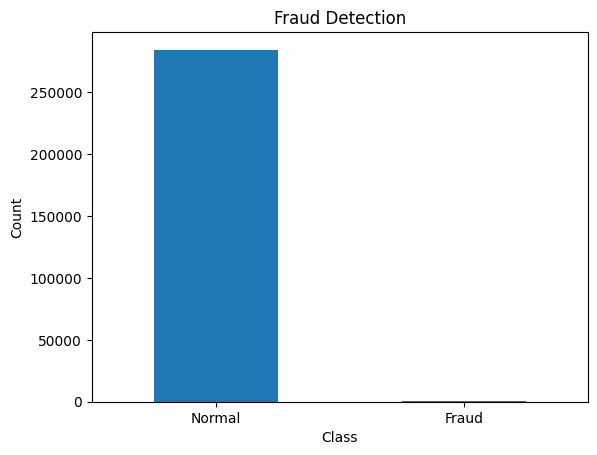

In [14]:
# Separating the data:
normal = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
# check shape
print(normal.shape)
print(fraud.shape)

#visualize the data:
labels = ["Normal", "Fraud"]
count_classes = credit_card_data.value_counts(credit_card_data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Fraud Detection")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

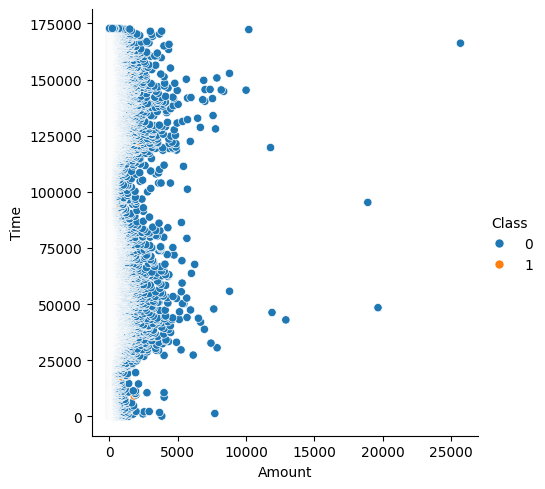

In [15]:
# statistical measures of the data:
normal.Amount.describe()
fraud.Amount.describe()

# visualize the data using seaborn:
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = credit_card_data)

Class
0    2500
1     492
Name: count, dtype: int64

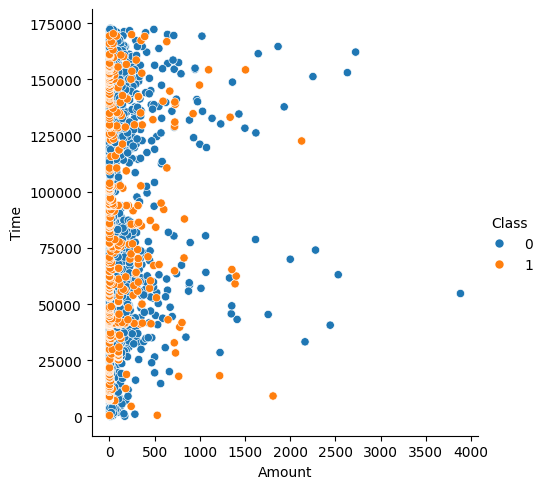

In [16]:
# Compare values of both transactions:
credit_card_data.groupby('Class').mean()

# Now we will build a sample dataset containing similar distribution of normal transaction and fraud transaction:
normal_sample = normal.sample(n=2500)
# Concat two data ( normal_sample and fraud) to create new dataframe which consist equal number of fraud transactions and normal transactions, In this way we balance our dataset (As our dataset is highly unbalanced initially) :
credit_card_new_data = pd.concat([normal_sample, fraud], axis=0)
#Let’s see our new dataset:
credit_card_new_data
#we are seeing by graph
newnormal = credit_card_new_data[credit_card_new_data.Class == 0]
newfraud = credit_card_new_data[credit_card_new_data.Class == 1]
newnormal.Amount.describe()
newfraud.Amount.describe()

# visualize the data using seaborn:
sns.relplot(x = 'Amount' , y = 'Time' , hue = 'Class', data = credit_card_new_data)
# Analyse our new dataset:
credit_card_new_data['Class'].value_counts()

In [17]:
# Splitting data into features and targets
X = credit_card_new_data.drop('Class', axis=1)
Y = credit_card_new_data['Class']

# splitting the data into training and testing data:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify = Y, random_state= 2)
print(X.shape, X_train.shape, X_test.shape)

(2992, 31) (2393, 31) (599, 31)


In [18]:
print(X_train)

        Unnamed: 0      Time        V1        V2        V3        V4  \
36504        36504   38568.0  1.109720  0.497388 -0.258516  1.093713   
276864      276864  167338.0 -1.374424  2.793185 -4.346572  2.400731   
271868      271868  164789.0  2.062440 -0.069837 -1.066514  0.421037   
124823      124823   77435.0 -0.406066  1.014394  1.381368  0.005135   
84737        84737   60439.0 -0.673353  1.696043  0.532558  2.291297   
...            ...       ...       ...       ...       ...       ...   
101190      101190   67753.0  0.896730 -0.806379  1.001637  0.112772   
81186        81186   58822.0 -4.384221  3.264665 -3.077158  3.403594   
31958        31958   36582.0 -0.124390 -0.600151  1.307661 -1.199529   
53959        53959   46230.0  1.548609 -1.058019  0.282919 -1.562807   
274475      274475  166028.0 -0.956390  2.361594 -3.171195  1.970759   

              V5        V6        V7        V8  ...       V20       V21  \
36504   0.431065  0.070798  0.021217  0.193303  ... -0.17322

In [19]:
# Creating Model:
model = LogisticRegression()
# training the Logistic Regression model with training data:
model.fit(X_train,Y_train)

LogisticRegression()

In [20]:
# Model Evaluation
X_train_pred = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print('Accuracy of Training data:', training_data_accuracy)
# classification report of the model on training data:
print(classification_report(X_train_pred, Y_train))

Accuracy of Training data: 0.9711659005432511
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2034
           1       0.87      0.95      0.91       359

    accuracy                           0.97      2393
   macro avg       0.93      0.96      0.95      2393
weighted avg       0.97      0.97      0.97      2393



Accuracy of Testing data: 0.8363939899833055
[[501  98]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       599
           1       0.00      0.00      0.00         0

    accuracy                           0.84       599
   macro avg       0.50      0.42      0.46       599
weighted avg       1.00      0.84      0.91       599



d:\Installed_Programs\Python 3.11\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Installed_Programs\Python 3.11\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Installed_Programs\Python 3.11\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

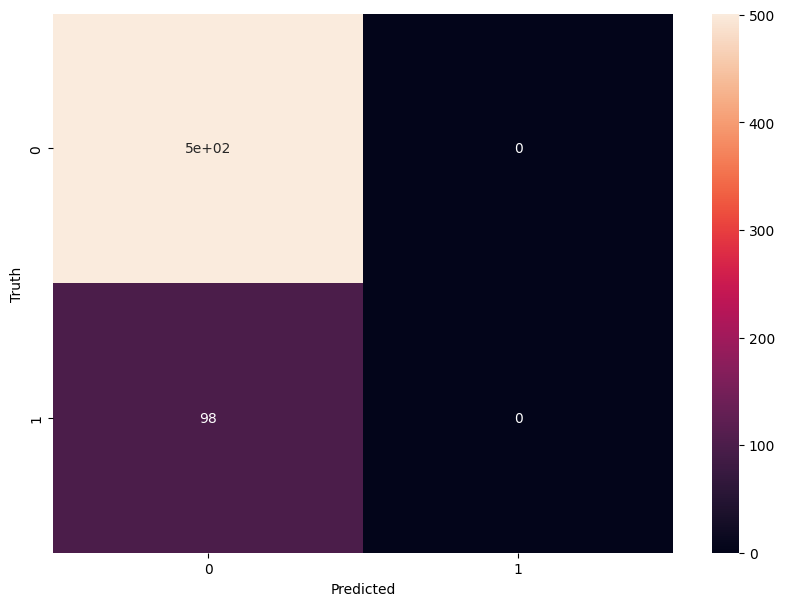

In [34]:
# accuracy on test data:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print('Accuracy of Testing data:', test_data_accuracy)

# confusion matrix and classification report of test data:
cm1=confusion_matrix(X_test_pred, Y_test)
print(cm1)
print(classification_report(X_test_pred, Y_test))
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [26]:
#Predicting Using SVM
model=SVC()
model.fit(X_train,Y_train)

SVC()

In [28]:
y_predicted=model.predict(X_test)

In [29]:
cm=confusion_matrix(Y_test,y_predicted)
cm

array([[501,   0],
       [ 98,   0]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

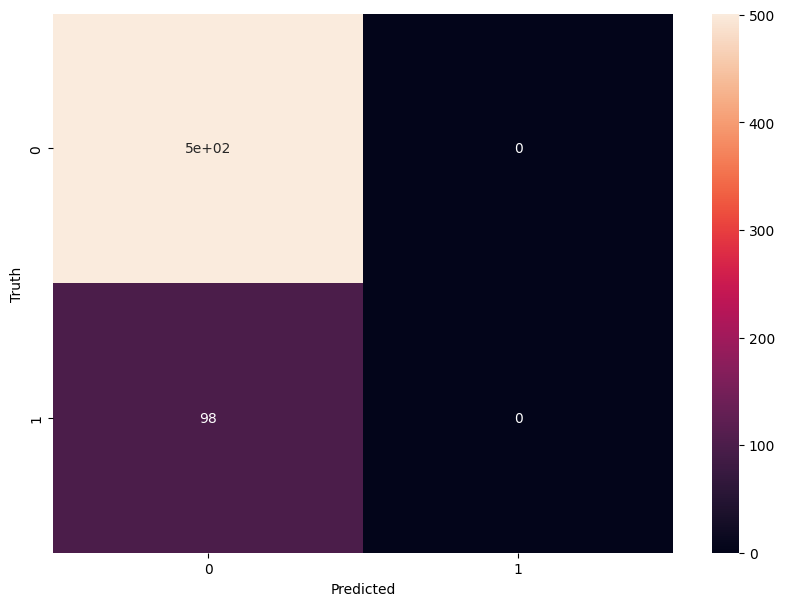

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')